In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as K
import tensorflow as tf
from src.models.train_model import train_resnet
from src.models.detectors import Detector
from tqdm import tqdm
from copy import deepcopy
from src.data.dataset_loaders import DatasetLoader, DOTADatasetLoader, AerialCarsDatasetLoader
from typing import Tuple
from src.features.pipelines import RawImageToImage
from src.features.processors import NormImage, Resize
from src.data.image_loaders import DOTASquareImageLoader, AerialCarsSquareImageLoader
from src.models.classifiers import ResnetModelWrapper
from src.models.detectors import NNSliderDetector
from src.data.sliders import SlidingWindow
import matplotlib.pyplot as plt
from src.data.make_dataset import make_dataset

## DOTA

In [2]:
EPOCHS=3

In [3]:
with open('../../data/processed/dota/data1.pickle', 'rb') as f:
    data = pickle.load(f)
# model, history = train_resnet(data, epochs=EPOCHS)

In [4]:
with open('../../data/processed/dota/data2.pickle', 'rb') as f:
    data = data + pickle.load(f)
#     data = pickle.load(f)
# model, history = train_resnet(data, epochs=EPOCHS, pretrained_model=model)

In [5]:
with open('../../data/processed/dota/data3.pickle', 'rb') as f:
    data = data + pickle.load(f)

In [6]:
model, history = train_resnet(data, epochs=2, batch_size=1000, lr=0.001)

Epoch 1/2
17/17 [==============================] - 199s 12s/step - loss: 0.6694 - accuracy: 0.6091 - val_loss: 0.5000 - val_accuracy: 0.7602
Epoch 2/2
17/17 [==============================] - 197s 12s/step - loss: 0.4213 - accuracy: 0.8208 - val_loss: 0.3788 - val_accuracy: 0.8258


In [7]:
with open('../../data/processed/dota/data4.pickle', 'rb') as f:
    # data = data + pickle.load(f)
    data = pickle.load(f)

In [8]:
with open('../../data/processed/dota/data5.pickle', 'rb') as f:
    data = data + pickle.load(f)

In [9]:
with open('../../data/processed/dota/data6.pickle', 'rb') as f:
    data = data + pickle.load(f)

In [10]:
model, history = train_resnet(data, epochs=2, batch_size=1000, lr=0.001, pretrained_model=model)

Epoch 1/2
14/14 [==============================] - 159s 11s/step - loss: 0.4738 - accuracy: 0.7527 - val_loss: 0.4221 - val_accuracy: 0.7601
Epoch 2/2
14/14 [==============================] - 160s 11s/step - loss: 0.3417 - accuracy: 0.8600 - val_loss: 0.3159 - val_accuracy: 0.8940


### ResNet training

In [11]:
# model, history = train_resnet(data, epochs=3, batch_size=1000, lr=0.001)

### Validation

In [12]:
data = None

In [13]:
def validate_model(
    dataset_loader: DatasetLoader,
    input_folder_filepath: str,
    images_files_types: Tuple[str],
    annotations_files_types: Tuple[str],
    detector: Detector,
    workers: int = 0
):

    images = dataset_loader.load_dataset(
        input_folder_filepath,
        images_files_types,
        annotations_files_types,
        False
    )

    processed_images = []

    for image in tqdm(images):
        processed_images.append(
            detector(deepcopy(image), workers, False)
        )

    return processed_images

In [33]:
dataset_loader = DOTADatasetLoader(
    image_loader=DOTASquareImageLoader()
)

process_pipeline=RawImageToImage(
    processors=[
        Resize((100, 100)),
        NormImage()
    ]
)

sliding_window = SlidingWindow(
    step_size=25,
    window_size=(50, 50)
)

slider_detector = NNSliderDetector(
    sliding_window=sliding_window,
    process_pipeline=process_pipeline,
    classifier=ResnetModelWrapper(model),
    treshold=0.95,
    nms_overlap=0.4
)

In [34]:
processed_images = validate_model(
    dataset_loader=dataset_loader,
    input_folder_filepath='../../data/raw/dota/val_dev',
    images_files_types=('jpg', 'JPG', 'png'),
    annotations_files_types=('txt',),
    detector=slider_detector
)

  0%|          | 0/5 [00:00<?, ?it/s](202, 100, 100, 3)
(202, 100, 100, 3)
(202, 100, 100, 3)
(202, 100, 100, 3)
(202, 100, 100, 3)
(202, 100, 100, 3)
(201, 100, 100, 3)
(201, 100, 100, 3)
(201, 100, 100, 3)
(201, 100, 100, 3)
(201, 100, 100, 3)
(201, 100, 100, 3)
(201, 100, 100, 3)
(201, 100, 100, 3)
 20%|██        | 1/5 [00:40<02:43, 40.95s/it]102
Overlap is 0.25990003844675125
Overlap is 0.0196078431372549
Overlap is 0.009996155324875048
Overlap is 0.25990003844675125
Overlap is 0.25990003844675125
Overlap is 0.5098039215686274
Overlap is 0.25990003844675125
Overlap is 0.00038446751249519417
Overlap is 0.5098039215686274
Overlap is 0.5098039215686274
Overlap is 0.009996155324875048
Overlap is 0.0196078431372549
Overlap is 0.25990003844675125
Overlap is 0.009996155324875048
Overlap is 0.5098039215686274
Overlap is 0.25990003844675125
Overlap is 0.0196078431372549
Overlap is 0.25990003844675125
Overlap is 0.5098039215686274
Overlap is 0.0196078431372549
Overlap is 0.5098039215686274
O

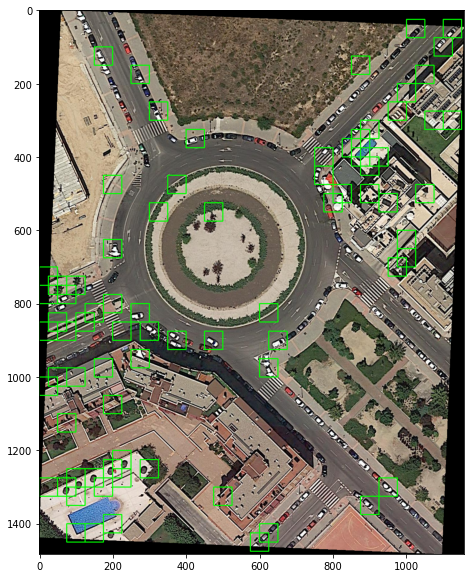

In [35]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[0][0])

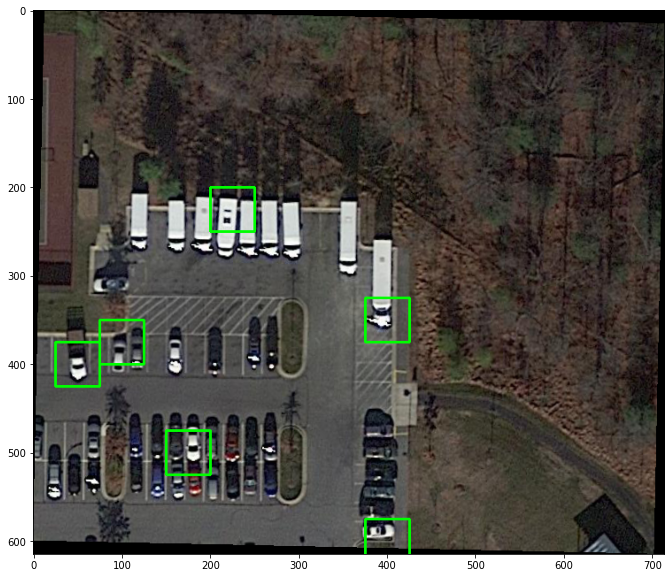

In [36]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[1][0])

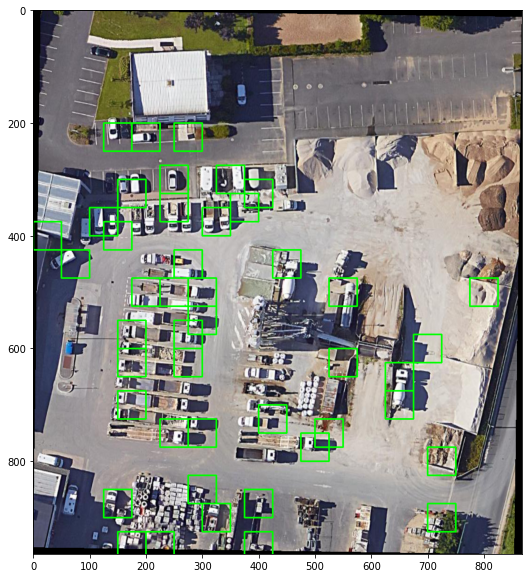

In [37]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[2][0])

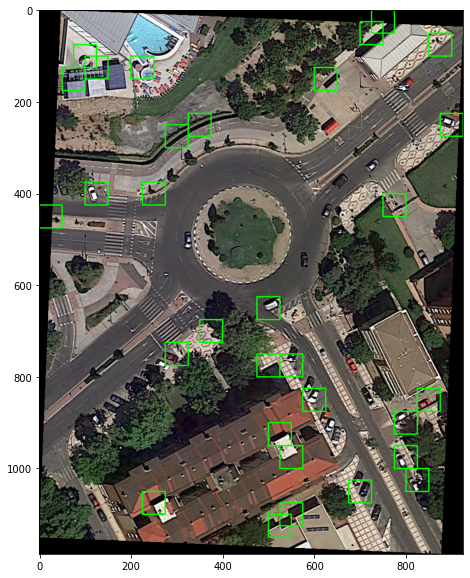

In [38]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[3][0])

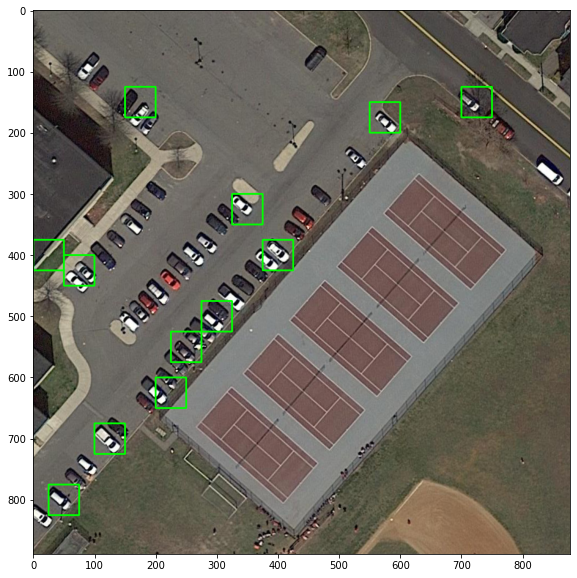

In [39]:
plt.figure(figsize=(20,10))
plt.imshow(processed_images[4][0])